### Using OpenCV, first convert any image with varying ligh condition to a grayscale image. Now implement edge detection first using the canny edge detection. Then apply simple thresholding and also Adaptive/OTSU thresholding using OpenCV to see the working of each of these methods. Once you obtain good results, use the obtained edge detection result as a mask to give color to all the edges (if edges use the color from the original image, else leave it black only

## Importing the libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


<class 'numpy.ndarray'>


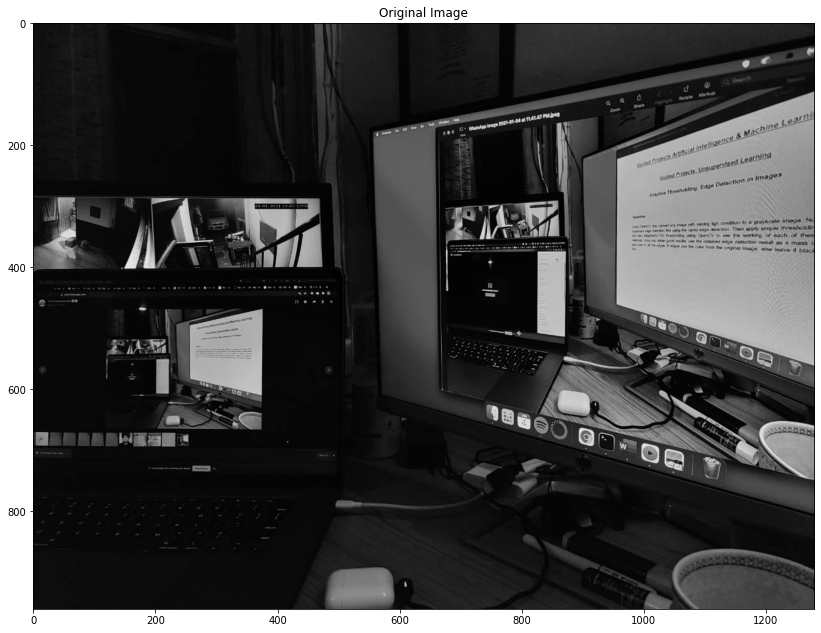

In [2]:
img = cv2.imread('img.jpeg',0)
print(type(img))
plt.figure(figsize=(14,12))
plt.title("Original Image")
plt.imshow(img,'gray')

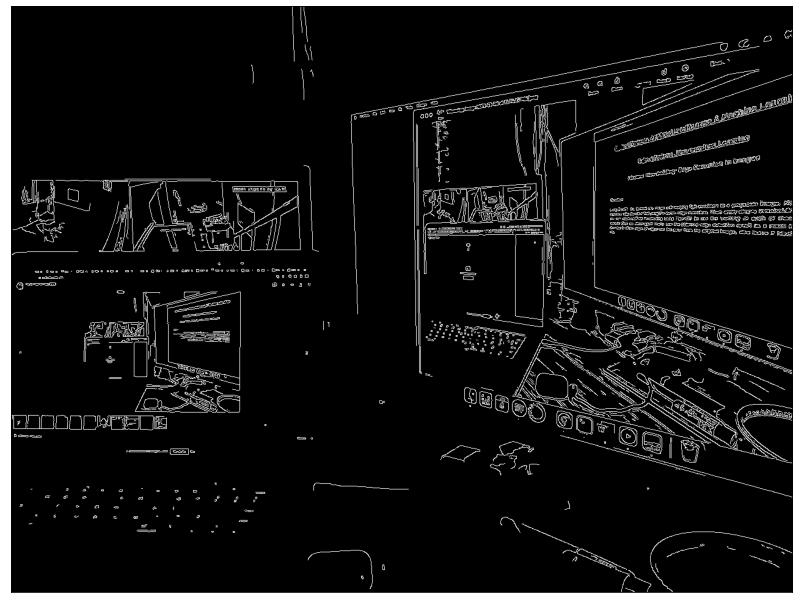

In [3]:
edges = cv2.Canny(img,110,200)
plt.figure(figsize=(14,12))
plt.imshow(img,'gray')
plt.imshow(edges,'gray')
plt.xticks([]),plt.yticks([])

plt.show()

## Global Thresholding, Adaptive Mean Thresholding, Adaptive Gaussian Thresholding

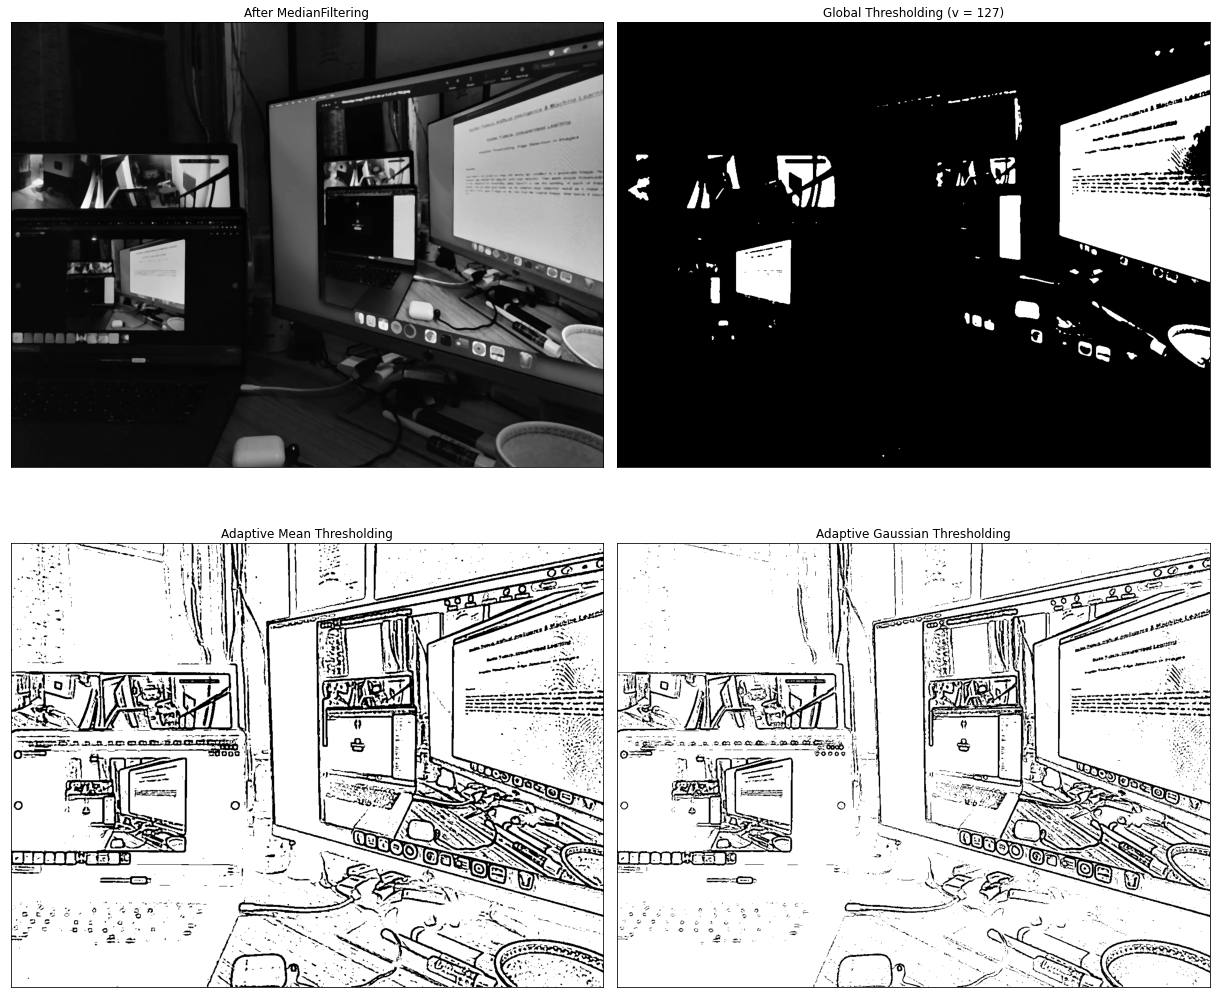

In [4]:
img = cv2.medianBlur(img,5) ## Remove noise using median Blur

## 2nd argument - threshold, 3rd Argument - Value assigned if pixel is greater than threshold
ret,th1 = cv2.threshold(img,127,220,cv2.THRESH_BINARY) 

## threshold value is the mean of neighbourhood area
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)

## threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2) 

titles = ['After MedianFiltering','Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

plt.figure(figsize=(17,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.tight_layout()
plt.show()

## Otsu's Thresholding

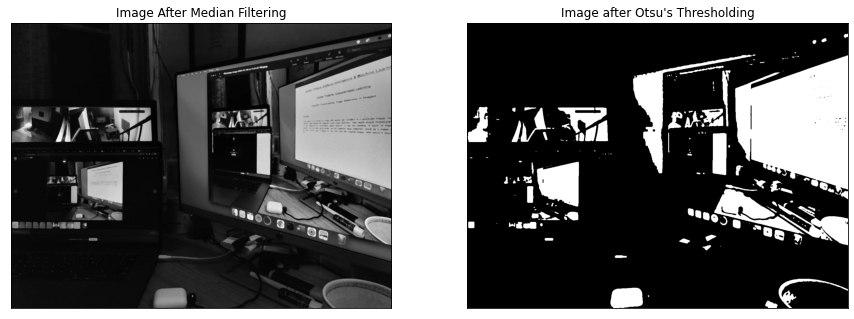

In [5]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.xticks([]),plt.yticks([]) 
plt.title("Image After Median Filtering")

plt.subplot(1,2,2)
plt.imshow(th2,'gray')
plt.xticks([]),plt.yticks([])
plt.title("Image after Otsu's Thresholding")
plt.show()

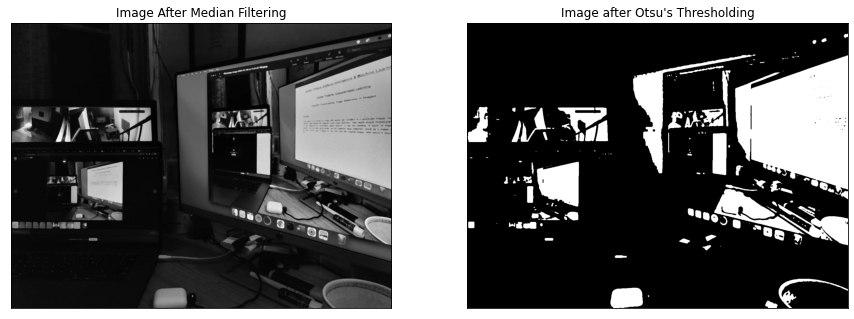

In [6]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.xticks([]),plt.yticks([])
plt.title("Image After Median Filtering")

plt.subplot(1,2,2)
plt.imshow(th2,'gray')
plt.xticks([]),plt.yticks([])
plt.title("Image after Otsu's Thresholding")
plt.show()

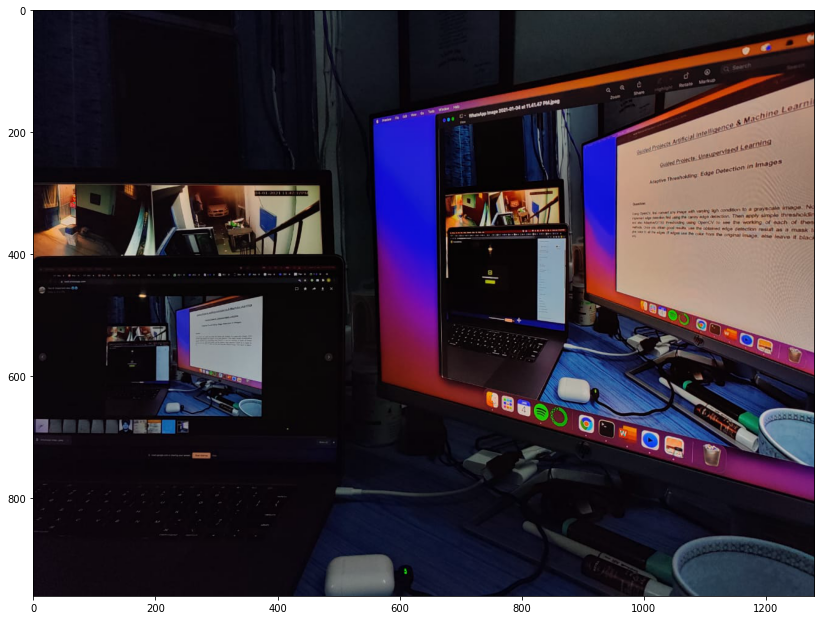

In [7]:
img_org = cv2.imread('img.jpeg')

img_final = img_org - th3[:,:,np.newaxis] 
plt.figure(figsize=(14,12))
plt.imshow(img_final)
plt.show()

## obtained edge detection result as a mask to give color to all the edges (if edges use the color from the original image, else leave it black only.

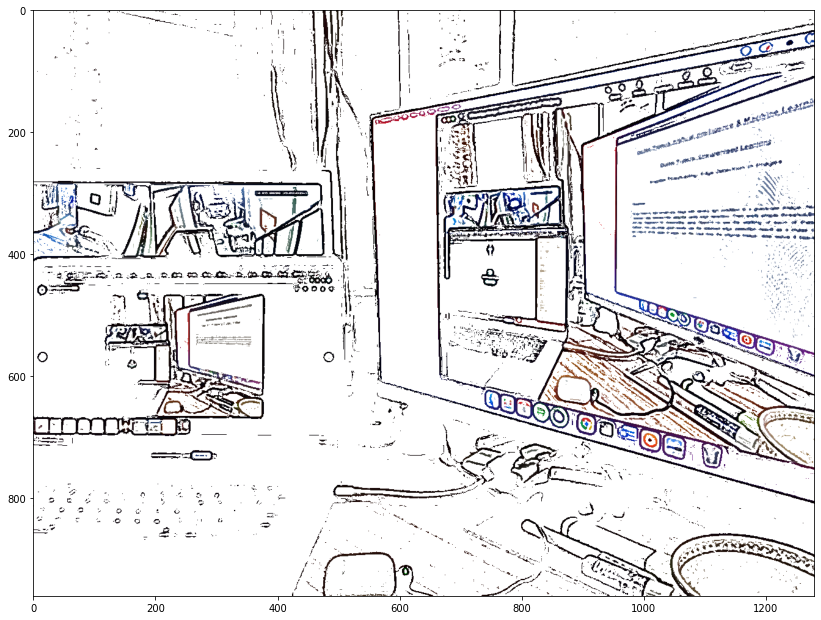

In [8]:
im = cv2.imread('img.jpeg',0)
im2 = cv2.imread('img.jpeg')
#edges = cv2.Canny(im,100,200)
#out = np.bitwise_and(im2, edges[:,:,np.newaxis])
out = np.bitwise_or(im2,th3[:,:,np.newaxis])
plt.figure(figsize=(14,12))
implot = plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

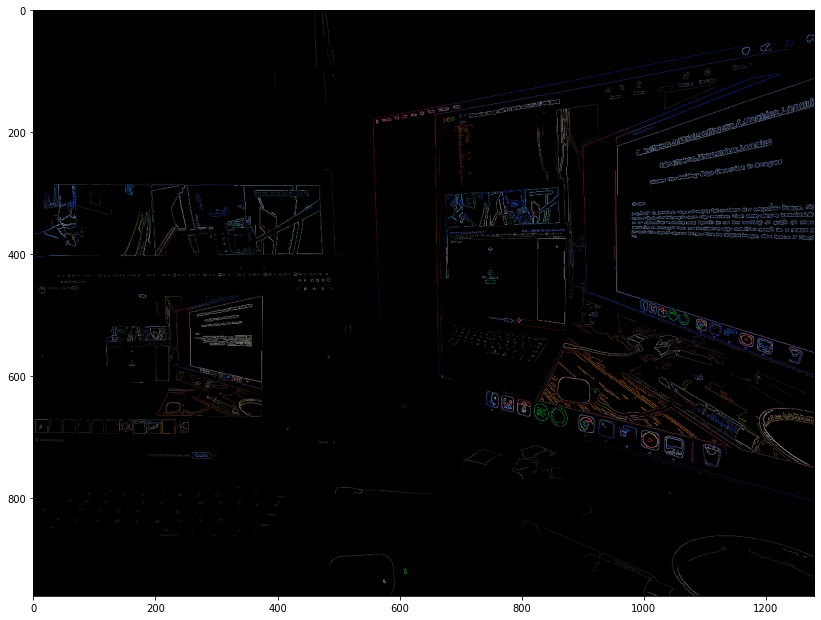

In [9]:
im = cv2.imread('img.jpeg',0)
im2 = cv2.imread('img.jpeg')
edges = cv2.Canny(im,100,200)
out = np.bitwise_and(im2, edges[:,:,np.newaxis])
plt.figure(figsize=(14,12))
implot = plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()